# 3. SARIMA Model

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ARIMA
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
# Lineare Reg
import statsmodels.api as sm

## Importing Data

In [2]:
cities = pd.read_csv("cities.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
cities = cities.drop(cities.columns[0], axis=1)
train = train.drop(train.columns[0], axis=1)
test = test.drop(test.columns[0], axis=1)
cities["Date"] = pd.to_datetime(cities["Date"])
train["Date"] = pd.to_datetime(train["Date"])
train = train.set_index("Date")
test["Date"] = pd.to_datetime(test["Date"])
test = test.set_index("Date")

In [4]:
cov_MSP = pd.read_csv("us-covid-data_minneapolis.csv")
cov_MIA = pd.read_csv("us-covid-data_miami.csv")
cov_LAS = pd.read_csv("us-covid-data_las-vegas.csv")
cov_SAN = pd.read_csv("us-covid-data_San Francisco.csv")

## 3.1 Results

### Minneapolis

In [5]:
import statsmodels.api as sm
# Create a SARIMAX model
model = sm.tsa.statespace.SARIMAX(train.LAS, order=(1,1,1), seasonal_order=(0,1,2,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                     LAS   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -1312.433
Date:                                 Mon, 22 Nov 2021   AIC                           2634.866
Time:                                         21:35:36   BIC                           2649.242
Sample:                                     02-29-2008   HQIC                          2640.708
                                          - 01-31-2020                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8378      0.195     -4.307      0.000      -1.219      -0

In [6]:
smodel_MSP = pm.auto_arima(train.MSP, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_MSP.summary()

# @ ALL:
# Ljung Box p value (Prob(Q) and JB p value (Prob(JB) are > 0.05 
# thus residuals are uncorrelated and normally distributed.

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2614.781, Time=0.54 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2627.314, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2616.217, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2616.816, Time=0.20 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2628.025, Time=0.17 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2613.420, Time=0.60 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=2613.872, Time=0.68 sec
 ARIMA(1,1,1)(2,1,1)[12]             : AIC=2615.419, Time=1.60 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=2615.419, Time=2.73 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2615.118, Time=0.87 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=2614.412, Time=0.73 sec
 ARIMA(1,1,1)(2,1,2)[12]             : AIC=inf, Time=2.29 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2615.916, Time=0.29 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=2616.149, Time=0.27 sec
 ARIMA(2,1,1)(1,1,1)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  144
Model:             SARIMAX(0, 1, 3)x(1, 1, [1], 12)   Log Likelihood               -1300.617
Date:                              Mon, 22 Nov 2021   AIC                           2613.234
Time:                                      21:36:36   BIC                           2630.485
Sample:                                           0   HQIC                          2620.244
                                              - 144                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0069      0.028     -0.244      0.807      -0.063       0.049
ma.L2          0.0395      0.086      0.458      0.647      -0.130       0.209
ma.L3         -0.0514      0.062     -0.828      0.408      -0.173       0.070
ar.S.L12      -0.4448      0.197     -2.263      0.024      -0.830      -0.060
ma.S.L12       0.3794      0.210      1.803      0.071      -0.033       0.792
sigma2      2.734e+07   1.11e-09   2.46e+16      0.000    2.73e+07    2.73e+07
===================================================================================
Ljung-Box (L1) (Q):                  10.70   Jarque-Bera (JB):                 2.49
Prob(Q):                              0.00   Prob(JB):                         0.29
Heteroskedasticity (H):               0.77   Skew:                            -0.21
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.11e+33. Standard errors may be unstable.
"""

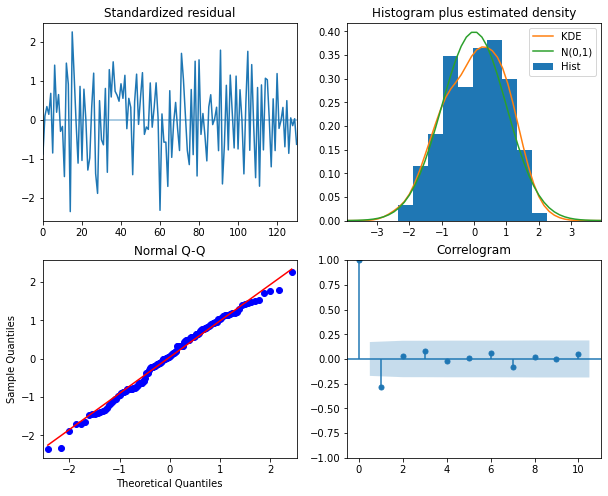

In [7]:
smodel_MSP.plot_diagnostics(figsize=(10,8))
plt.show()

### Miami

In [8]:
smodel_MIA = pm.auto_arima(train.MIA, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=1, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_MIA.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2678.568, Time=0.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2672.600, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2676.341, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2676.708, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2676.136, Time=0.08 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2681.646, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2675.275, Time=0.03 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2675.814, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2677.617, Time=0.36 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=2673.072, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 2.001 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1335.300
Date:                            Mon, 22 Nov 2021   AIC                           2672.600
Time:                                    21:36:45   BIC                           2675.475
Sample:                                         0   HQIC                          2673.768
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.15e+07    5.2e+06      7.973      0.000    3.13e+07    5.17e+07
===================================================================================
Ljung-Box (L1) (Q):                  13.90   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.00   Prob(JB):                         0.83
Heteroskedasticity (H):               0.55   Skew:                             0.11
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

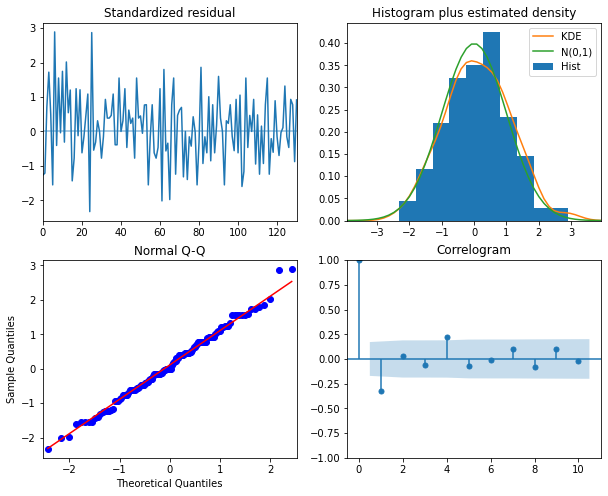

In [9]:
smodel_MIA.plot_diagnostics(figsize=(10,8))
plt.show()

### Las Vegas

In [10]:
smodel_LAS = pm.auto_arima(train.LAS, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel_LAS.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2636.292, Time=0.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2639.866, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2636.758, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2636.404, Time=0.15 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=2640.955, Time=0.33 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=0.58 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2634.866, Time=1.02 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=1.68 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2635.147, Time=0.67 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=2635.038, Time=1.13 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=2634.770, Time=1.43 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=2635.942, Time=0.44 sec
 ARIMA(2,1,1)(1,1,2)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=inf, Time=0.74 sec
 ARIMA(2,1,0)(0,1,2)[12]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  144
Model:             SARIMAX(2, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood               -1312.093
Date:                                 Mon, 22 Nov 2021   AIC                           2634.187
Time:                                         21:37:06   BIC                           2648.563
Sample:                                              0   HQIC                          2640.028
                                                 - 144                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0283      0.038     -0.735      0.463      -0.104       0.047
ar.L2          0.0378      0.058      0.648      0.517      -0.076       0.152
ma.S.L12      -0.0993      0.025     -3.963      0.000      -0.148      -0.050
ma.S.L24      -0.0416      0.017     -2.516      0.012      -0.074      -0.009
sigma2      3.104e+07      2e-10   1.55e+17      0.000     3.1e+07     3.1e+07
===================================================================================
Ljung-Box (L1) (Q):                   4.37   Jarque-Bera (JB):                 2.75
Prob(Q):                              0.04   Prob(JB):                         0.25
Heteroskedasticity (H):               1.22   Skew:                            -0.06
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.81e+32. Standard errors may be unstable.
"""

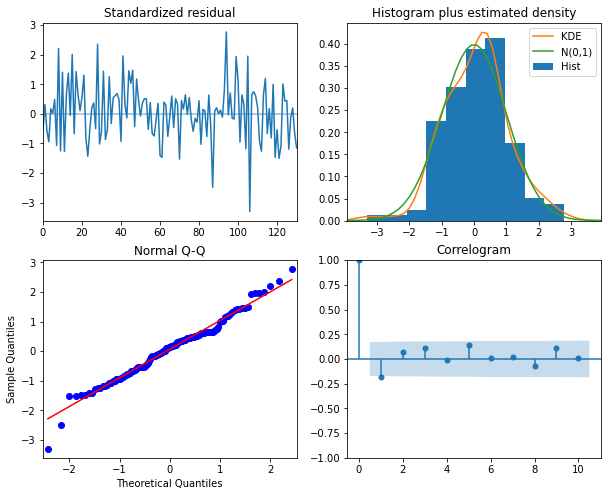

In [11]:
smodel_LAS.plot_diagnostics(figsize=(10,8))
plt.show()

## 3.2 Forecasting

In [12]:
def forecasting(Column_Train, Column_Test, SARIMA, City):
    # Forecast
    n_periods = 20 # 79/4Wch = Month to Forecast
    fitted, confint = SARIMA.predict(n_periods = n_periods, return_conf_int = True)
    index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq = 'MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index = index_of_fc)
    lower_series = pd.Series(confint[:, 0], index = index_of_fc)
    upper_series = pd.Series(confint[:, 1], index = index_of_fc)
    
    # Plot
    plt.style.use("ggplot")
    plt.figure(figsize = (18, 5))
    plt.plot(Column_Train, label = "Training-Data")
    plt.plot(Column_Test, label = "Testing-Data")
    plt.plot(fitted_series, color = 'darkgreen', label = "Forecast with 95% Confidence Interval ")
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color = 'k', alpha = .15)
    plt.axvline(x = 18280, color = 'black')
    plt.ylabel("House Price")
    plt.xlabel("Years")
    plt.text(x = 17450, y = 330000, s = "First COVID-19 Case in the US")

    plt.title(f"SARIMA Forecasting for {City}")
    plt.legend(loc = 2)
    plt.show()

### Minneapolis

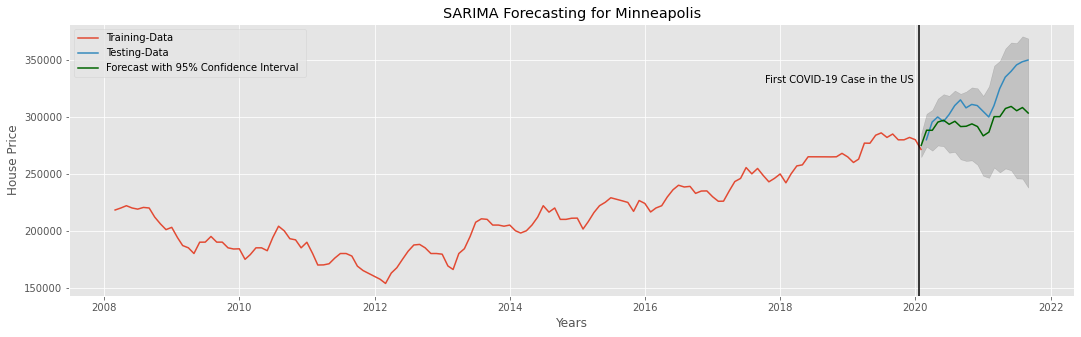

In [13]:
forecasting(train.MSP, test.MSP, smodel_MSP, "Minneapolis")

### Miami

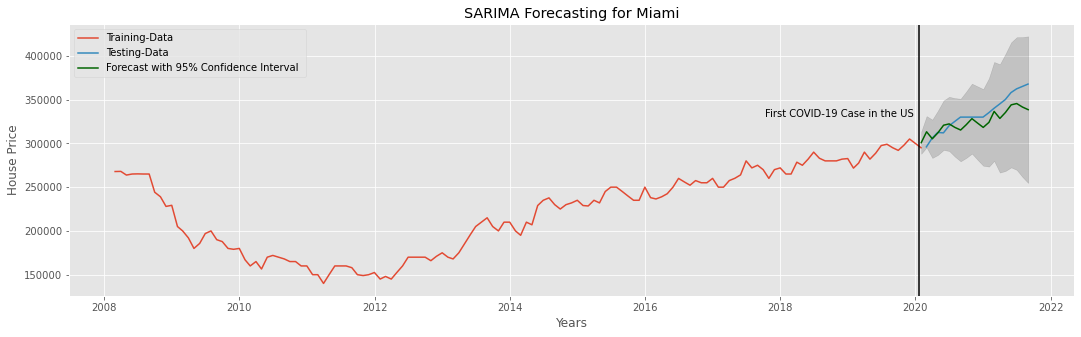

In [14]:
forecasting(train.MIA, test.MIA, smodel_MIA, "Miami")

### Las Vegas

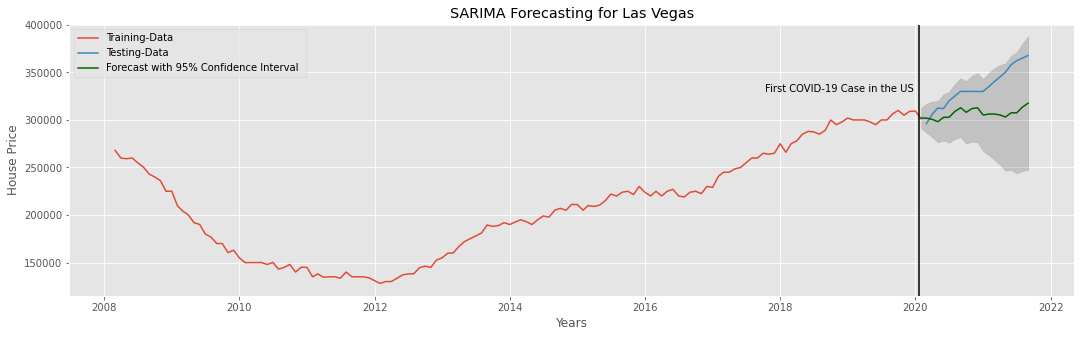

In [15]:
forecasting(train.LAS, test.MIA, smodel_LAS, "Las Vegas")

# 4. Lineare Regression

In [18]:
def preprocessing_ols(Test, SARIMA, Covid):
    new_test = Test[1:]
    
    # Forecast
    n_periods = 19
    fitted, confint = SARIMA.predict(n_periods = n_periods, return_conf_int = True)
    index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq = 'MS')
    fitted_series = pd.Series(fitted, index = index_of_fc)
    new_fitted_series = fitted_series[1:]
    
    residuals = [new_test[i]-new_fitted_series[i] for i in range(len(new_test))]
    
    new_cov = Covid[:18]
    new_cov = new_cov["cases"]
    
    d = {"Residuals": residuals, "Covid": new_cov}
    df = pd.DataFrame(d)
    
    x = df["Covid"]
    y = df["Residuals"]
     
    mod = sm.OLS(exog = x, endog = y)
    res = mod.fit()
    print(res.summary())

### Minneapolis

In [22]:
preprocessing_ols(test.MSP, smodel_MSP, cov_MSP)

                                 OLS Regression Results                                
Dep. Variable:              Residuals   R-squared (uncentered):                   0.648
Model:                            OLS   Adj. R-squared (uncentered):              0.627
Method:                 Least Squares   F-statistic:                              31.28
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                    3.23e-05
Time:                        21:38:31   Log-Likelihood:                         -197.83
No. Observations:                  18   AIC:                                      397.7
Df Residuals:                      17   BIC:                                      398.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Miami

In [20]:
preprocessing_ols(test.MIA, smodel_MIA, cov_MIA)

                                 OLS Regression Results                                
Dep. Variable:              Residuals   R-squared (uncentered):                   0.510
Model:                            OLS   Adj. R-squared (uncentered):              0.482
Method:                 Least Squares   F-statistic:                              17.72
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                    0.000590
Time:                        21:38:15   Log-Likelihood:                         -191.10
No. Observations:                  18   AIC:                                      384.2
Df Residuals:                      17   BIC:                                      385.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Las Vegas

In [21]:
preprocessing_ols(test.LAS, smodel_LAS, cov_LAS)

                                 OLS Regression Results                                
Dep. Variable:              Residuals   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              8.484
Date:                Mon, 22 Nov 2021   Prob (F-statistic):                     0.00970
Time:                        21:38:19   Log-Likelihood:                         -209.18
No. Observations:                  18   AIC:                                      420.4
Df Residuals:                      17   BIC:                                      421.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Special Backup: San Francisco

In [148]:
smodel_SAN = pm.auto_arima(train.SAN, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=1, D=1, 
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


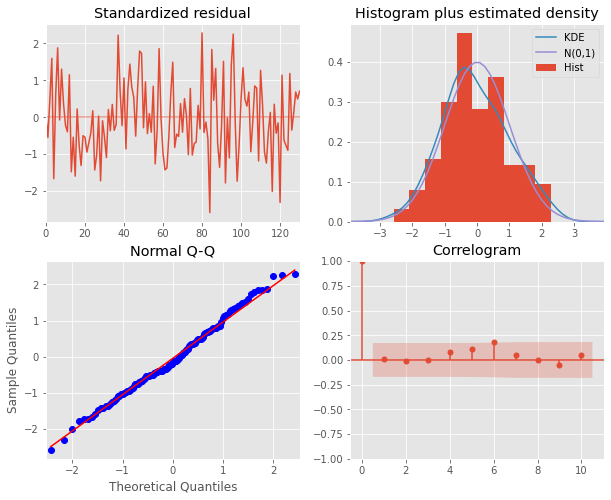

In [149]:
smodel_SAN.plot_diagnostics(figsize=(10,8))
plt.show()

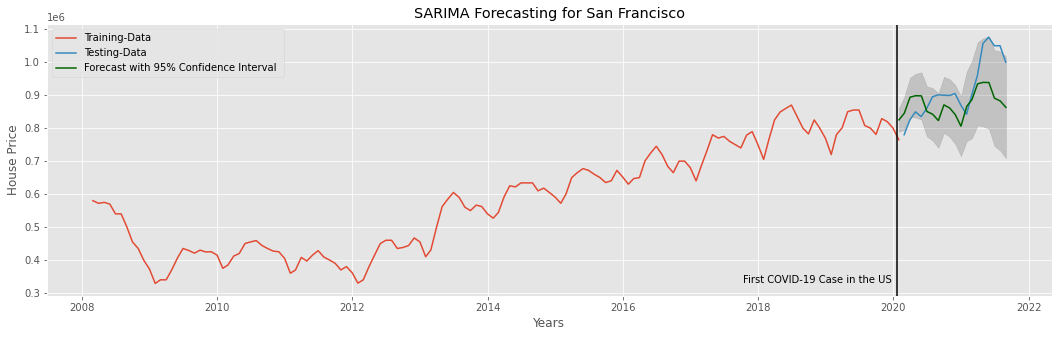

In [150]:
forecasting(train.SAN, test.SAN, smodel_SAN, "San Francisco")

In [151]:
preprocessing_ols(test.SAN, smodel_SAN, cov_SAN)

                                 OLS Regression Results                                
Dep. Variable:                  Covid   R-squared (uncentered):                   0.623
Model:                            OLS   Adj. R-squared (uncentered):              0.601
Method:                 Least Squares   F-statistic:                              28.07
Date:                Sat, 20 Nov 2021   Prob (F-statistic):                    5.90e-05
Time:                        15:42:26   Log-Likelihood:                         -110.93
No. Observations:                  18   AIC:                                      223.9
Df Residuals:                      17   BIC:                                      224.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


##### UNUSED

In [154]:
cov_MSP = cov_MSP[:-2]
cov_MIA = cov_MIA[:-2]
cov_LAS = cov_LAS[:-2]
test = test[1:]

In [ ]:
cov_MSP["date"] = pd.to_datetime(cov_MSP["date"])
fig, ax1 = plt.subplots(figsize = (18, 5))
plt.style.use("ggplot")

ax2 = ax1.twinx()
ax1.plot(cov_MSP["date"], test.MSP, 'g-')
ax2.plot(cov_MSP["date"], cov_MSP.cases, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Median Selling Price', color='g')
ax2.set_ylabel('COVID-19 Cases', color='b')

plt.show()

In [ ]:
fig, ax1 = plt.subplots(figsize = (18, 5))
plt.style.use("ggplot")
plt.scatter(test.MSP, cov_MSP.cases)